In [1]:
from __future__ import print_function, division
import os
from collections import OrderedDict
import logging

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
# Use the same color cylcer as Seaborn
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import lsst.afw.table as afwTable
import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import nmf, proximal
import lsst.meas.deblender.utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)

INFO:lsst.meas.deblender:Total parents: 41
INFO:lsst.meas.deblender:Unblended sources: 25
INFO:lsst.meas.deblender:Sources with multiple peaks: 16


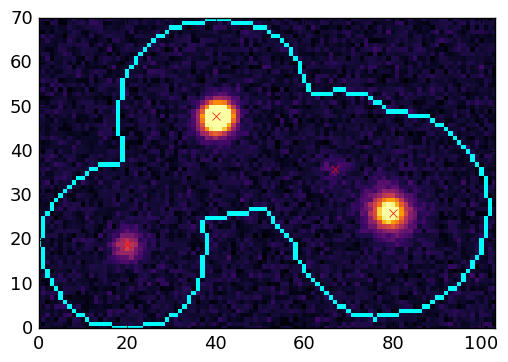

(<lsst.afw.detection.detectionLib.Footprint; proxy of <Swig Object of type 'std::shared_ptr< lsst::afw::detection::Footprint > *' at 0x111f7cf00> >,
 <lsst.afw.detection.detectionLib.PeakCatalog; proxy of <Swig Object of type 'lsst::afw::table::PeakCatalog *' at 0x111f7cf90> >)

In [2]:
dataPath = os.path.abspath(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..','data', 'sim_data'))
filters = ["g","r", "i","z",'y']
imgFilename = os.path.join(dataPath, "test2/{0}_{1}.fits")
catFilename = os.path.join(dataPath, "test2/det_merge.fits")
simFilename = os.path.join(dataPath, "test2/catalog_true.fits")

expDb = proximal.ExposureDeblend(filters, imgFilename, catFilename, simFilename)
expDb.getParentFootprint(parentIdx=0, condition=expDb.mergedTable["peaks"]==4, fidx=1)

In [3]:
expDb.deblend()

In [4]:
expDb.deblendedParents

OrderedDict([(1,
              <lsst.meas.deblender.proximal.DeblendedParent instance at 0x111475878>),
             (2,
              <lsst.meas.deblender.proximal.DeblendedParent instance at 0x111486170>),
             (3,
              <lsst.meas.deblender.proximal.DeblendedParent instance at 0x111486dd0>),
             (5,
              <lsst.meas.deblender.proximal.DeblendedParent instance at 0x1113e5a70>),
             (10,
              <lsst.meas.deblender.proximal.DeblendedParent instance at 0x1113e5e18>),
             (12,
              <lsst.meas.deblender.proximal.DeblendedParent instance at 0x1113e5560>),
             (13,
              <lsst.meas.deblender.proximal.DeblendedParent instance at 0x111488248>),
             (14,
              <lsst.meas.deblender.proximal.DeblendedParent instance at 0x111488098>),
             (16,
              <lsst.meas.deblender.proximal.DeblendedParent instance at 0x1114886c8>),
             (18,
              <lsst.meas.deblender.proxim